# Denoising Filters

 ## Linear filters and non-linear filters.
 - Gaussian is an example of linear filter. 
 - Non-linear filters preserve edges. 
    - Median filter is an example of non-linear filter. 
        - The algorithm selects the median value of all the pixels in the selected window
## Famous filter:
- NLM: https://scikit-image.org/docs/dev/auto_examples/filters/plot_nonlocal_means.html


Bhattiprolu, S. (2023). python_for_microscopists. GitHub. https://github.com/bnsreenu/python_for_microscopists/blob/master/96- 096_What is Gaussian denoising.py

## Gaussian Filters

Summing up the values of Gaussian filter we get 1, this is done to preserve the energy of the image

- Applying a Gaussian filter is used to remove noise from an image:
    - However is not always the good method
    - In general, when I choose a kernel with a small size, it can be useful since there is a minimal loss of information, but with larger kernel may have lose of information from the blurring effect
    - Therefore, the Gaussian filter is now usually used if edge preservation or texture information is useful

(7, 7)


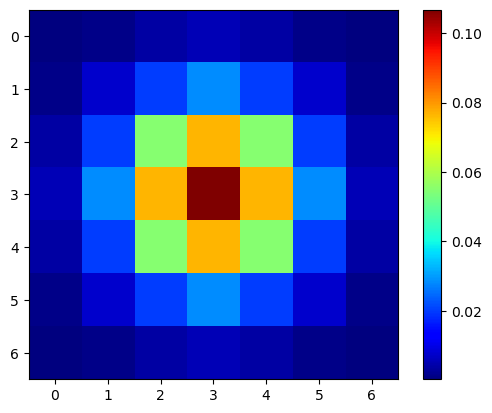

In [10]:
import numpy 
from matplotlib import pyplot as plt

### this is a 2d filter --> a 2d gaussian!
### if size = 3, it creates 7 values for each row, since goes from -3 to 3 including the 0
def gaussian_kernel(size, size_y=None):
    size = int(size)
    if not size_y:
        size_y = size
    else:
        size_y = int(size_y)
    x, y = numpy.mgrid[-size:size+1, -size_y:size_y+1]
    g = numpy.exp(-(x**2/float(size)+y**2/float(size_y)))
    return g / g.sum()
 
## also looking at the heatmaps we see values closer to the center are higher
gaussian_kernel_array = gaussian_kernel(3)
print(gaussian_kernel_array.shape)
plt.imshow(gaussian_kernel_array, cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()
plt.show()

In [1]:
import cv2
import numpy as np
from skimage import io, img_as_float,img_as_ubyte
from skimage.filters import gaussian
import matplotlib.pyplot as plt

In [2]:
### Let's load the images
#### converting the images to a gray image (so only one channel) and with the type float
##### The conversion is needed since many libraries for image processing need this conversion
img_gaussian_noise = img_as_float(io.imread('.\BSE_25sigma_noisy.jpg', as_gray=True))
img_salt_pepper_noise = img_as_float(io.imread('.\BSE_salt_pepper.jpg', as_gray=True))

Check the images shapes

In [3]:
img_gaussian_noise.shape

(714, 901)

In [4]:
img_salt_pepper_noise.shape

(714, 901)

In [5]:
# showing using cv2 is not possible in a jupyter notebook
##cv2.imshow("Original", img_gaussian_noise)
##cv2.waitKey(0)  # Wait indefinitely until a key is pressed
##cv2.destroyAllWindows()  # Close the window after a key is pressed

### Let's look at the images with the gaussian noise
- Zooming in we can see the noise in the areas

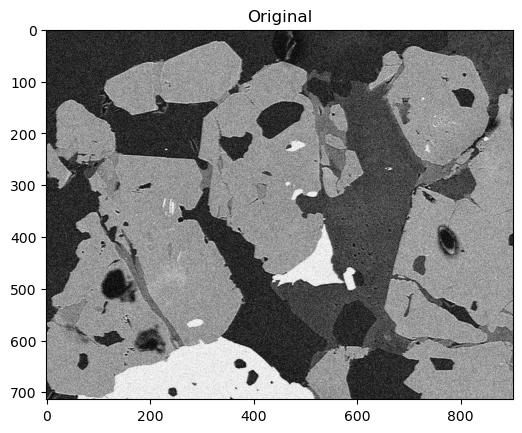

In [6]:
plt.imshow(img_gaussian_noise, cmap='gray')
plt.title("Original")
plt.show()

### Let's use the cv2_GaussianBlur method
- BORDER_CONSTANT - Pad the image with a constant value (i.e. black or 0)
- BORDER_REPLICATE: The row or column at the very edge of the original is replicated to the extra border.

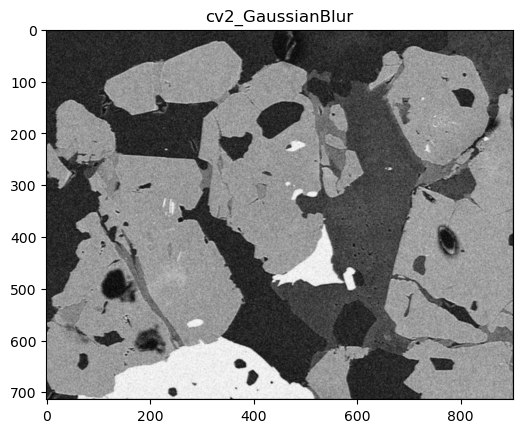

In [7]:
gaussian_using_cv2 = cv2.GaussianBlur(img_gaussian_noise, (3,3), 0, borderType=cv2.BORDER_CONSTANT)
gaussian_using_cv2 =img_as_ubyte(gaussian_using_cv2)

cv2.imwrite('saved_gaussian_using_cv2.jpg', gaussian_using_cv2)

plt.imshow(gaussian_using_cv2, cmap='gray')
plt.title("cv2_GaussianBlur")
plt.show()

### Let's use the skimage
#### the difference is that here i set the sigma value, while in the cv2 i set the kernel size and the sigma is computed from there

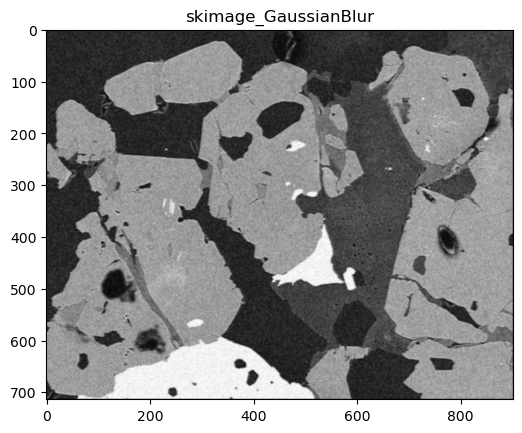

In [8]:
gaussian_using_skimage = gaussian(img_gaussian_noise, sigma=1, mode='constant', cval=0.0)
gaussian_using_skimage = img_as_ubyte(gaussian_using_skimage )

io.imsave('saved_gaussian_using_skimage.jpg', gaussian_using_skimage)
plt.imshow(gaussian_using_skimage, cmap='gray')
plt.title("skimage_GaussianBlur")
plt.show()

# Let's compare the 3 different denoising filters

In [13]:
img = img_as_float(io.imread("./noisy_img.jpg"))

## Check the shape

In [14]:
img.shape

(522, 265, 3)

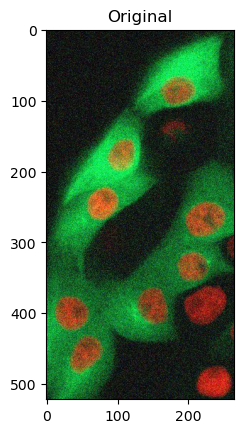

In [18]:
plt.imshow(img)
plt.title("Original")
plt.show()

### let's apply the gaussian filter

In [15]:
from scipy import ndimage as nd

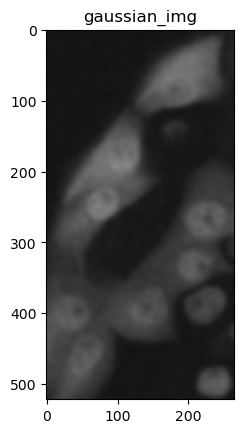

In [17]:
gaussian_img = nd.gaussian_filter(img, sigma=3)
plt.imshow(gaussian_img)
plt.title("gaussian_img")
plt.show()

### Resutts:
- The noise in the black areas is better
- Clearly the info about the edges are not preserved

# Median Filter

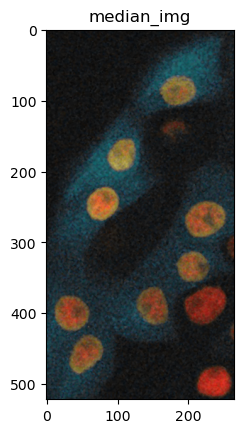

In [19]:
median_img = nd.median_filter(img, size=3)
plt.imshow(median_img)
plt.title("median_img")
plt.show()

### Results
- here the edges are preserved well
- still some noise in the black areas with size = 3

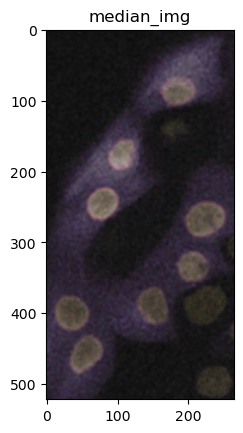

In [20]:
median_img = nd.median_filter(img, size=5)
plt.imshow(median_img)
plt.title("median_img")
plt.show()

### Results:
- less noise but worse edges
- so i would go with size = 3

# Non-local means denoising

In [21]:
from skimage.restoration import denoise_nl_means, estimate_sigma

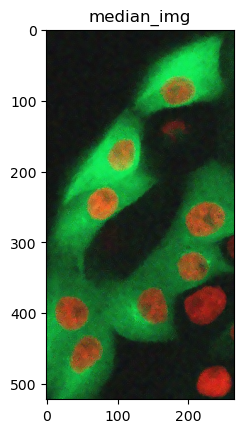

In [26]:
sigma_est = np.mean(estimate_sigma(img, channel_axis=-1))

patch_kw = dict(patch_size=5,      
                patch_distance=3,  
               channel_axis=-1)

denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=False,
                               patch_size=5, patch_distance=3, channel_axis=-1)

plt.imshow(denoise_img)
plt.title("median_img")
plt.show()

### Results:
- it's clearly the better in terms of edges and reduction of noise (zooming in)